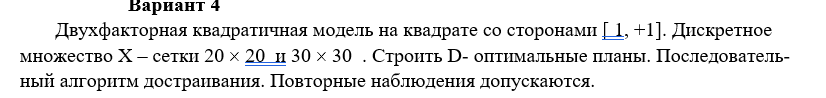

Модель остается той же

In [2]:
%precision 3

'%.3f'

In [ ]:
#импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [4]:
#изначальные параметры
m = 6#количество неизвестных параметров
# для сетки 30х30 изначальное количество точек будет равно 900
N_list = [20, 25, 30, 35, 40]#для такой размерности нужно делать
grid_size = [20, 30]#30
n = grid_size[0]*grid_size[0]#почему это определяется как разм_стеки х разм_сетки хз
s = n#для итераций
p=[0]*n#наши изначальные пэшки

In [5]:
# наша функция
def func(x):
    return np.array([1, x[0], x[1], x[0]*x[1], x[0]**2, x[1]**2])

In [6]:
# Информационная матрица
def M_calc(x, p, m):
    n_rg = np.count_nonzero(p)
    # Если n_rg < m, то матрица вырожденная, мы её регуляризируем

    M = np.zeros((m, m))
    for i in range(n):
        M += p[i] * np.outer(func(x[i]), func(x[i]))
    
    # Регуляризация
    if n_rg < m:
        gamma = 0.1
        M += gamma * np.eye(m)
    return M

In [7]:
#Дисперсионная матрица
def D_calc(M):
    return np.linalg.inv(M)

In [8]:
def X_calc(grid_size):
    #создаем по 20(30) точек в этом отрезке
    x1 = np.linspace(-1,1,grid_size)
    x2 = np.linspace(-1,1,grid_size)
    #для создания в целом квадрата точек
    X1, X2 = np.meshgrid(x1, x2)#матрицы, где каждая строка копия x1(x2)
    X = np.column_stack([X1.ravel(), X2.ravel()])#преобразе матрицы в вектора, и выводим координаты
    return X

In [9]:
def d_calc(x, D):
    return func(x) @ D @ func(x).T

In [10]:
#изначальные матрицы и х
x = X_calc(grid_size[0])
M = M_calc(x, p, m)
D = D_calc(M)
len(x)

400

In [11]:
determinats = [[], []]
p = {20 : [],
     30 : []}
for grid in range(2):
    x = X_calc(grid_size[grid])
    n = grid_size[grid]*grid_size[grid]
    for j in range(len(N_list)):
        #тут начинается алгоритм
        CurP = np.zeros(n)
        print(f"Протокол решения к плану с сеткой {grid_size[grid]}x{grid_size[grid]} и c количеством наблюдений {N_list[j]}")
        print("i (индекс) -> x[i] (добавленной) -> p[i] (изменёный у x) -> max (f M f.T)")
        for s in range(N_list[j]):
            M = M_calc(x, CurP, m)
            D = D_calc(M)

            maxD = 0
            i = -1
            for i in range(len(x)):
                if (s < m and CurP[i] == 0) or (s >= m):
                    cur_d = d_calc(x[i], D)
                    if maxD < cur_d:
                        maxD = cur_d
                        ind = i
            # перераспределение весов
            for k in range(n):
                if CurP[k] != 0:
                    if k == ind:
                        CurP[k] = (CurP[k] * s + 1) / (s + 1)
                    else:
                        CurP[k] = CurP[k] * s / (s + 1)
                else:
                    if k == ind:
                        CurP[k] += 1 / (s + 1)
            print(ind, '\t', *[round(i, 3) for i in x[ind]],'\t', round(CurP[ind], 3), "\t", round(maxD, 3))
        
        print('\n\n\n\n ')
        p[grid_size[grid]].append(CurP)
        determinats[grid].append(np.linalg.det(M))
    

Протокол решения к плану с сеткой 20x20 и c количеством наблюдений 20
i (индекс) -> x[i] (добавленной) -> p[i] (изменёный у x) -> max (f M f.T)
0 	 -1.0 -1.0 	 1.0 	 60.0
399 	 1.0 1.0 	 0.5 	 53.443
19 	 1.0 -1.0 	 0.333 	 50.244
380 	 -1.0 1.0 	 0.25 	 48.35
10 	 0.053 -1.0 	 0.2 	 7.975
199 	 1.0 -0.053 	 0.167 	 7.749
209 	 -0.053 0.053 	 0.143 	 17.181
180 	 -1.0 -0.053 	 0.125 	 9.636
390 	 0.053 1.0 	 0.111 	 9.705
380 	 -1.0 1.0 	 0.2 	 7.475
0 	 -1.0 -1.0 	 0.182 	 8.042
399 	 1.0 1.0 	 0.167 	 8.731
19 	 1.0 -1.0 	 0.154 	 9.228
190 	 0.053 -0.053 	 0.071 	 6.89
219 	 1.0 0.053 	 0.067 	 6.309
380 	 -1.0 1.0 	 0.188 	 6.664
0 	 -1.0 -1.0 	 0.176 	 6.995
399 	 1.0 1.0 	 0.167 	 7.169
19 	 1.0 -1.0 	 0.158 	 7.579
10 	 0.053 -1.0 	 0.1 	 7.547




 
Протокол решения к плану с сеткой 20x20 и c количеством наблюдений 25
i (индекс) -> x[i] (добавленной) -> p[i] (изменёный у x) -> max (f M f.T)
0 	 -1.0 -1.0 	 1.0 	 60.0
399 	 1.0 1.0 	 0.5 	 53.443
19 	 1.0 -1.0 	 0.333 	 50.244
3

In [26]:
print(determinats)

[[0.01066677771942713, 0.011001100802242678, 0.01110539550477539, 0.011216435115532464, 0.01123504563793842], [0.010630285809829547, 0.010979702612270496, 0.011099408579690134, 0.011218859746974438, 0.011237278516881416]]


In [12]:
def printGrid(p, N, j, N_list):
    x = np.arange(-1, 1, 2/N)
    y = np.arange(-1, 1, 2/N)
    X, Y = np.meshgrid(x, y)
    sizes = []
    for i in range(len(p)):
        if p[i] > 0:
            sizes.append(100)
        else:
            sizes.append(0)
    
    plt.scatter(X, Y, s=sizes, c='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xticks([-1, -0.5, 0, 0.5, 1])
    plt.yticks([-1, -0.5, 0, 0.5, 1])
    plt.grid(True)
    titl = f'Полученный план сетки {N}x{N} для {N_list[j]} наблюдений'
    plt.title(titl)
    plt.show()

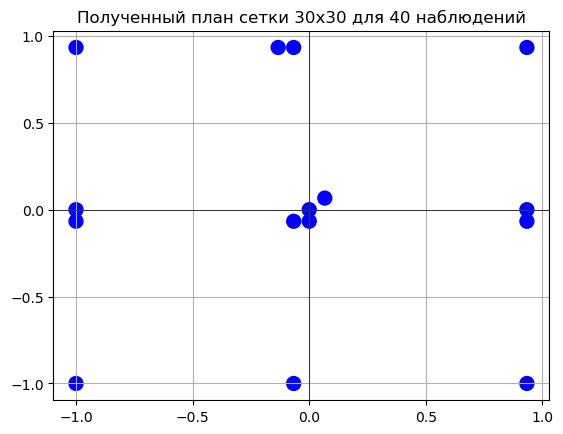

In [25]:
N = 30
i = 4
printGrid(p[N][i], N, i, N_list)

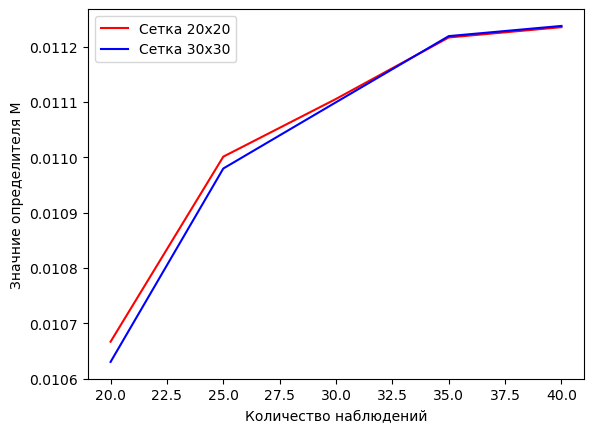

In [14]:
plt.plot(N_list, determinats[0], color='r', label='Сетка 20x20')
plt.plot(N_list, determinats[1], color='b', label='Сетка 30x30')
plt.xlabel('Количество наблюдений')
plt.ylabel('Значние определителя M')
plt.legend()
plt.show()

In [15]:
sum(p[20][2])

0.9999999999999999

In [16]:
print(*['%.4E' % e for e in determinats[0]])
print(*['%.4E' % e for e in determinats[1]])

1.0667E-02 1.1001E-02 1.1105E-02 1.1216E-02 1.1235E-02
1.0630E-02 1.0980E-02 1.1099E-02 1.1219E-02 1.1237E-02
